In [1]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
import torch
import matplotlib.pyplot as plt
from d2l import torch as d2l

In [2]:
f = lambda x: 3*x**2 - 4*x

In [3]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h = {h:.5f}, numerical limit={(f(1+h) - f(1)) / h:.5f}')

h = 0.10000, numerical limit=2.30000
h = 0.01000, numerical limit=2.03000
h = 0.00100, numerical limit=2.00300
h = 0.00010, numerical limit=2.00030
h = 0.00001, numerical limit=2.00003


In [4]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')
    d2l.plt.style.use('dark_background')
    
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    
    
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid(alpha=.5)

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [19]:
%matplotlib inline

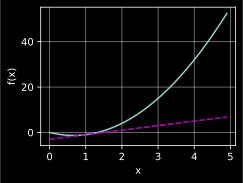

In [20]:
x = np.arange(0,5,.1)
plot(x, [f(x), 2*x - 3], 'x', 'f(x)')

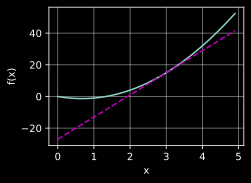

In [6]:
plot(x, [f(x), 14*x - 27], 'x', 'f(x)')

In [7]:
import sys

In [8]:
sys.version


'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [9]:
import numpy as np
np.__version__

'1.26.4'

In [10]:
from torch.distributions.multinomial import Multinomial
import random

In [11]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [45, 55]


In [32]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample((10,))

tensor([[51., 49.],
        [52., 48.],
        [48., 52.],
        [52., 48.],
        [43., 57.],
        [45., 55.],
        [56., 44.],
        [49., 51.],
        [59., 41.],
        [56., 44.]])

In [26]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5014, 0.4986])

In [29]:
#c = Multinomial(1, fair_probs).sample((100,)).cumsum(dim=0)
#c / c.sum(dim=1, keepdims=True)

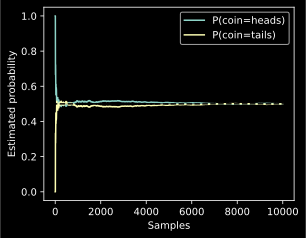

In [55]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

set_figsize((4.5, 3.5))
plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend();